In [355]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rangalamahesh/bank-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bank-churn


In [474]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from IPython.display import FileLink
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [357]:
os.listdir('/kaggle/input/bank-churn')

['train.csv', 'test.csv']

In [358]:
df = pd.read_csv('/kaggle/input/bank-churn/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [359]:
df.shape

(165034, 14)

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [361]:
df.apply(pd.isnull).sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [362]:
df.duplicated().sum()

0

In [363]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

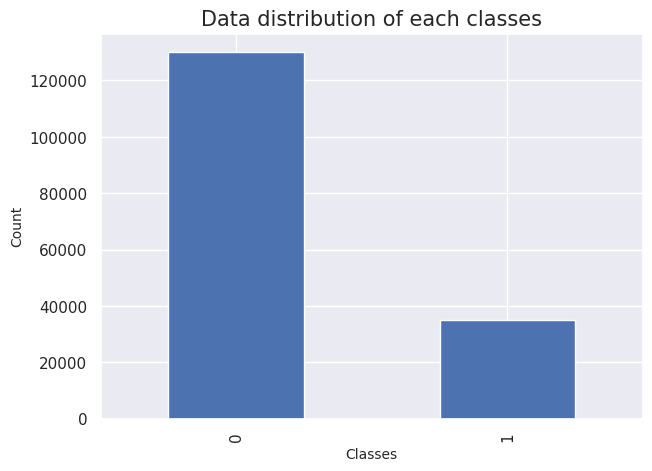

In [364]:
df['Exited'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each classes', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

In [365]:
df_copy = df.copy()

In [366]:
df1 = df[df['Exited'] == 1]
df2 = df[df['Exited'] == 0].sample(df1.shape[0])

In [367]:
df = pd.concat([df1, df2])

In [368]:
df.shape

(69842, 14)

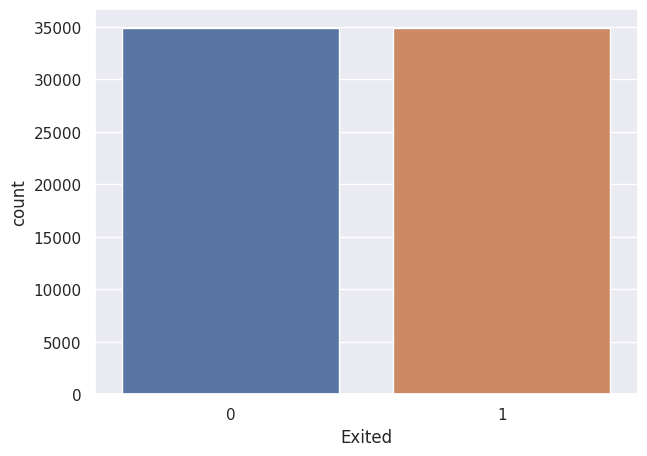

In [369]:
plt.figure(figsize = (7, 5))
sns.countplot(data = df, x = 'Exited')
plt.show()

In [370]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
18,18,15671358,Hargreaves,645,Germany,Female,55.0,8,120105.43,1,1.0,0.0,125083.29,1
19,19,15650670,Ts'ui,559,France,Male,61.0,1,153711.26,1,0.0,1.0,180890.40,1
23,23,15576044,Akabueze,554,Germany,Male,44.0,9,121823.26,1,1.0,0.0,79577.68,1
25,25,15671137,Sazonova,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1


In [371]:
df.drop(columns = ['id', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [372]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
18,645,Germany,Female,55.0,8,120105.43,1,1.0,0.0,125083.29,1
19,559,France,Male,61.0,1,153711.26,1,0.0,1.0,180890.40,1
23,554,Germany,Male,44.0,9,121823.26,1,1.0,0.0,79577.68,1
25,703,Spain,Male,39.0,9,0.00,1,1.0,0.0,131363.57,1


In [373]:
df.shape

(69842, 11)

In [374]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,69842.000000,69842.000000,69842.000000,69842.000000,69842.000000,69842.000000,69842.000000,69842.000000,69842.000000
mean,654.858695,40.228828,4.964821,61213.542178,1.471235,0.747201,0.422683,113165.956703,0.500000
std,80.474310,9.345921,2.810018,63145.278886,0.601858,0.434620,0.493989,50343.936622,0.500004
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,596.000000,34.000000,3.000000,0.000000,1.000000,0.000000,0.000000,74836.340000,0.000000
50%,656.000000,39.000000,5.000000,58635.700000,1.000000,1.000000,0.000000,119348.670000,0.500000
75%,710.000000,46.000000,7.000000,122295.170000,2.000000,1.000000,1.000000,156474.960000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [375]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [376]:
categorical_columns, numerical_columns = [], []
for column in df.columns:
    if df[column].nunique() < 20:
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [377]:
print(f'*** Number of categorical columns: {len(categorical_columns)}')
print(f'*** Categorical columns: {categorical_columns}')
print(f'+++ Number of numerical columns: {len(numerical_columns)}')
print(f'+++ Numerical columns: {numerical_columns}')

*** Number of categorical columns: 7
*** Categorical columns: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
+++ Number of numerical columns: 4
+++ Numerical columns: ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [378]:
categorical_columns.remove('Exited')

*** Column: Geography
Number of unique values: 3
Unique values: ['Germany' 'France' 'Spain']
Value counts of unique values:
 Geography
France     36622
Germany    18876
Spain      14344
Name: count, dtype: int64


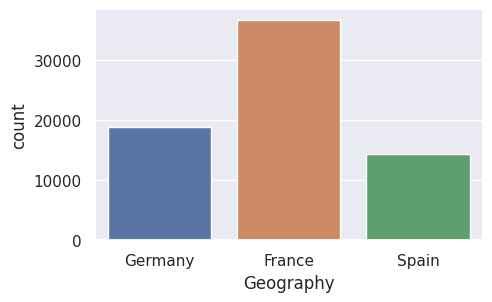

*** Column: Gender
Number of unique values: 2
Unique values: ['Male' 'Female']
Value counts of unique values:
 Gender
Male      35723
Female    34119
Name: count, dtype: int64


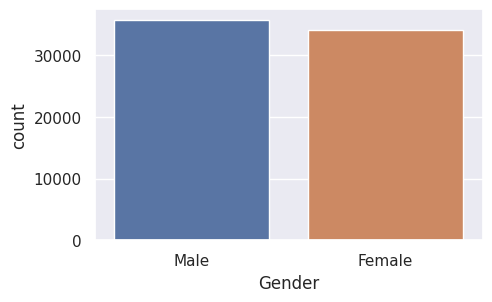

*** Column: Tenure
Number of unique values: 11
Unique values: [ 4  8  1  9  0  5  3  6  2 10  7]
Value counts of unique values:
 Tenure
4     7660
2     7494
5     7462
1     7338
3     7267
7     7211
8     7168
9     6991
6     6521
10    2481
0     2249
Name: count, dtype: int64


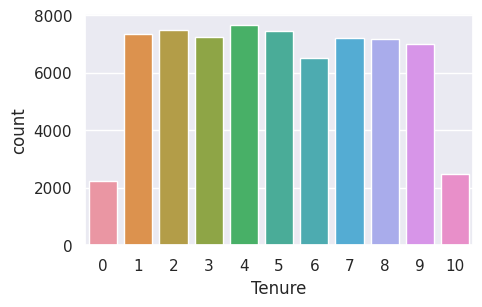

*** Column: NumOfProducts
Number of unique values: 4
Unique values: [1 2 3 4]
Value counts of unique values:
 NumOfProducts
1    40446
2    26312
3     2652
4      432
Name: count, dtype: int64


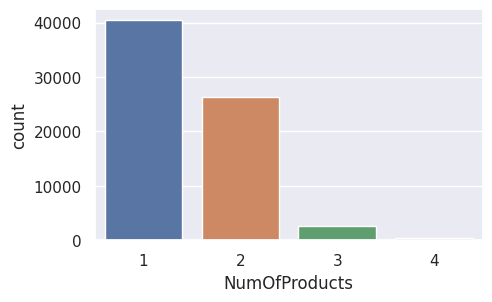

*** Column: HasCrCard
Number of unique values: 2
Unique values: [1. 0.]
Value counts of unique values:
 HasCrCard
1.0    52186
0.0    17656
Name: count, dtype: int64


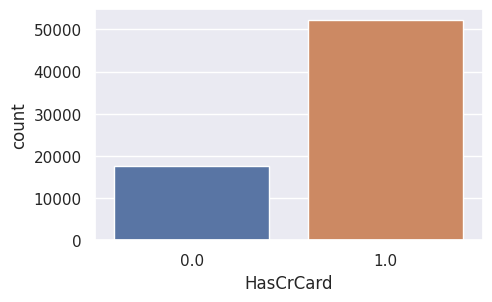

*** Column: IsActiveMember
Number of unique values: 2
Unique values: [0. 1.]
Value counts of unique values:
 IsActiveMember
0.0    40321
1.0    29521
Name: count, dtype: int64


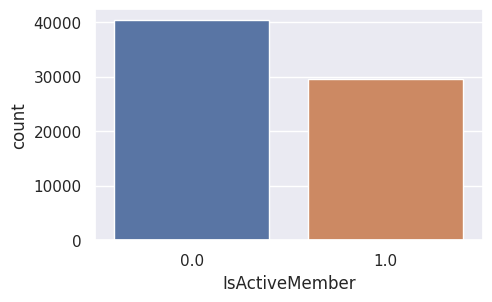

In [379]:
for column in categorical_columns:
    print(f'*** Column: {column}')
    print(f'Number of unique values: {df[column].nunique()}')
    print(f'Unique values: {df[column].unique()}')
    print(f'Value counts of unique values:\n {df[column].value_counts()}')
    plt.figure(figsize = (5, 3))
    sns.countplot(data = df, x = column)
    plt.show()
    print('=============================================================')

In [380]:
df = df[df['NumOfProducts'] != 4]

In [381]:
df.shape

(69410, 11)

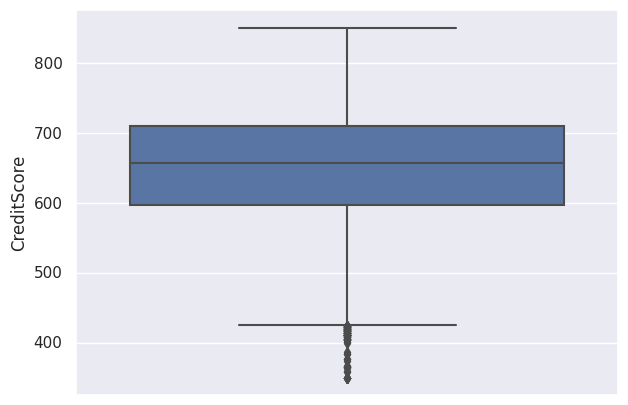

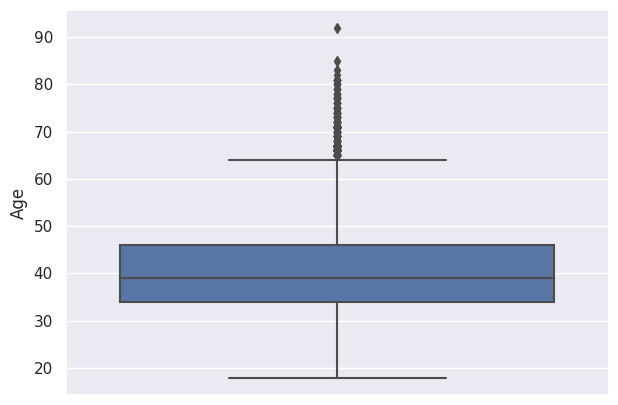

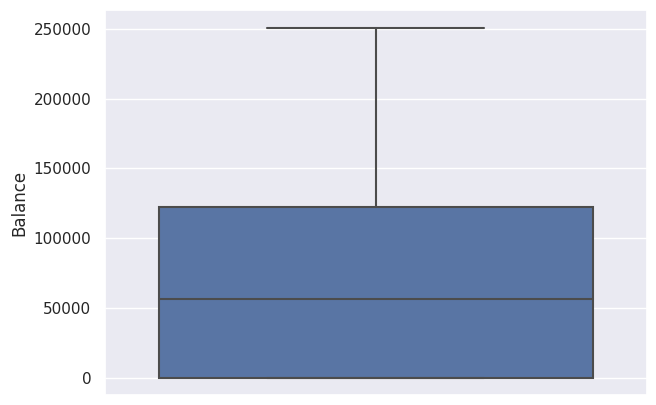

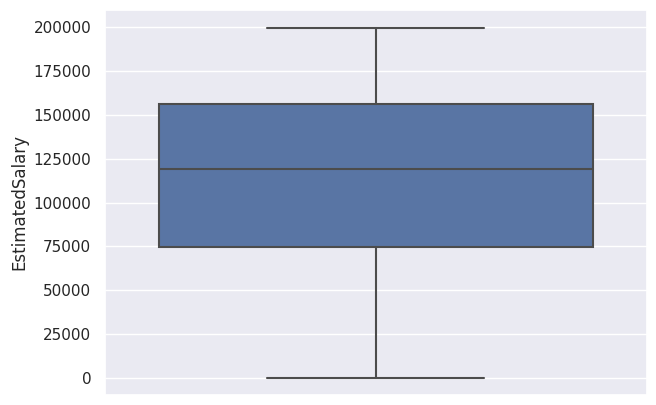

In [382]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = df, y = column)
    plt.show()

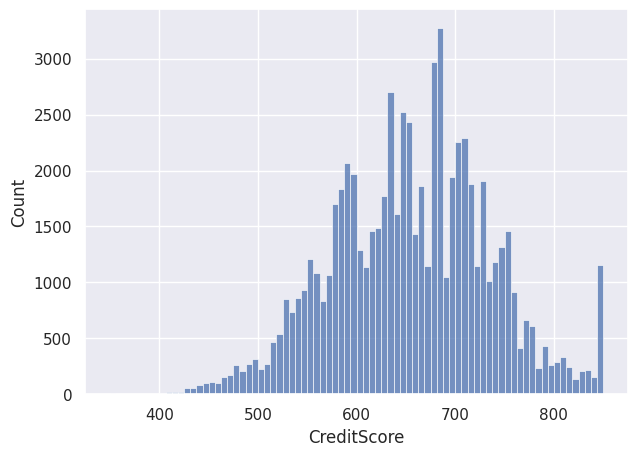

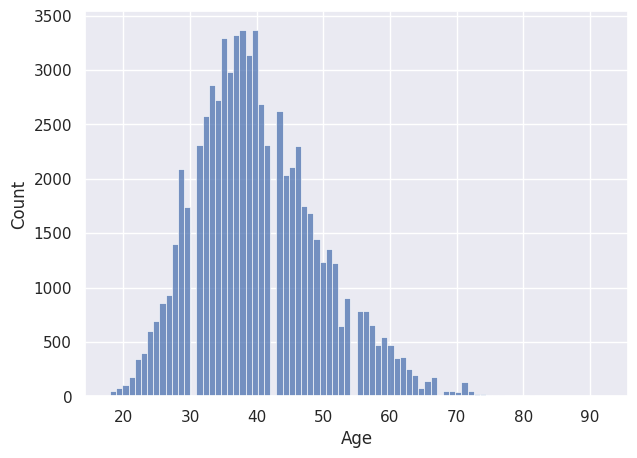

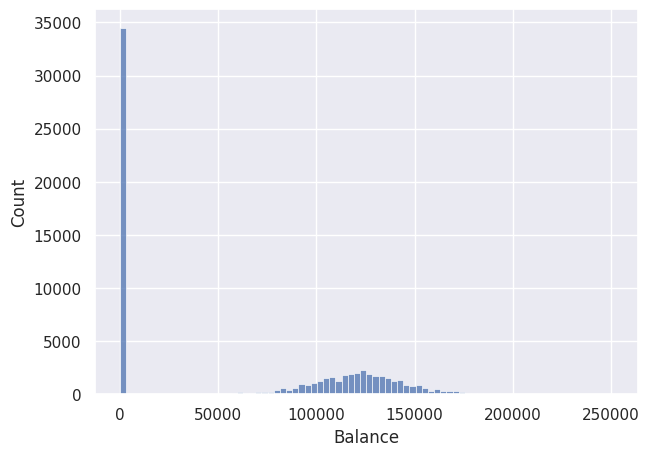

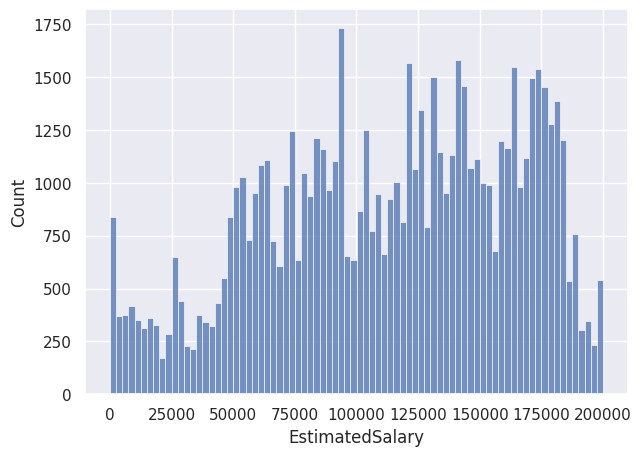

In [383]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.histplot(data = df, x = column, bins = 80)
    plt.show()

In [384]:
df.shape

(69410, 11)

In [385]:
df[df['CreditScore'] < 430].shape

(116, 11)

In [386]:
df = df[df['CreditScore'] > 430]

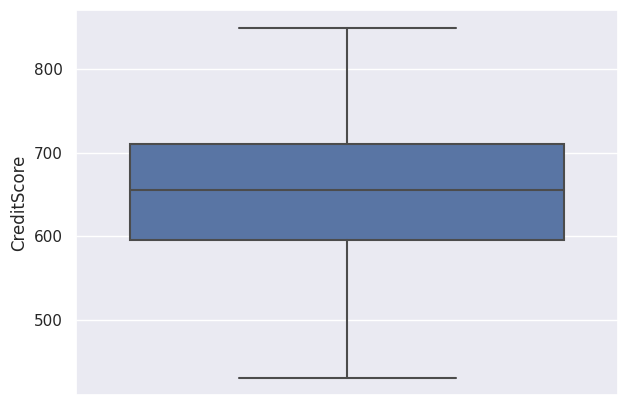

In [387]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = df, y = 'CreditScore')
plt.show()

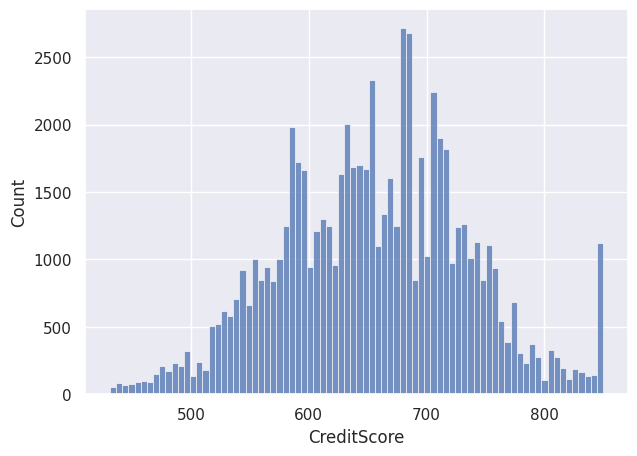

In [388]:
plt.figure(figsize = (7, 5))
sns.histplot(data = df, x = 'CreditScore', bins = 80)
plt.show()

In [389]:
df['CreditScore'].max()

850

In [390]:
df[df['CreditScore'] == df['CreditScore'].max()].shape

(1003, 11)

In [391]:
df = df[df['CreditScore'] != df['CreditScore'].max()]

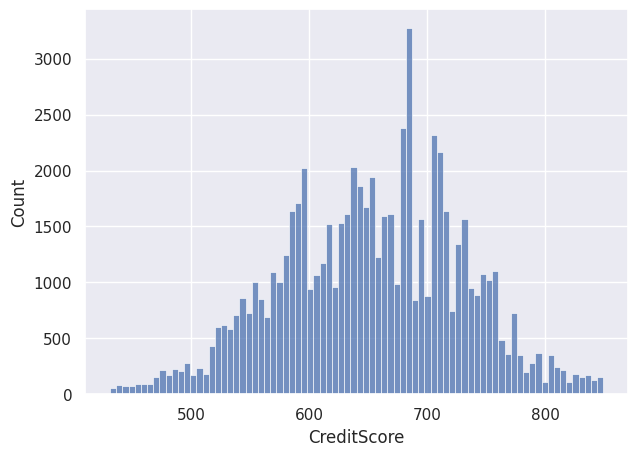

In [392]:
plt.figure(figsize = (7, 5))
sns.histplot(data = df, x = 'CreditScore', bins = 80)
plt.show()

In [393]:
df[df['Age'] > 63].shape

(989, 11)

In [394]:
df = df[df['Age'] < 63]

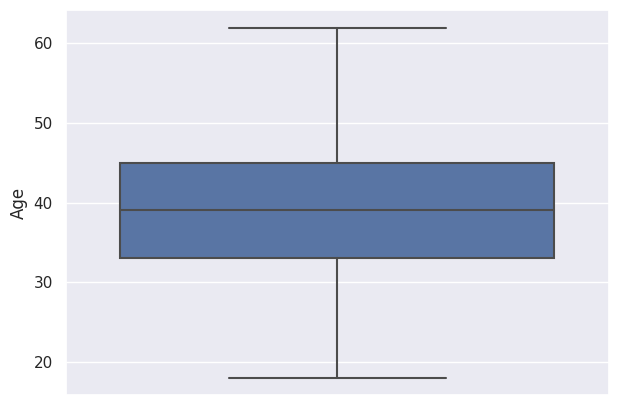

In [395]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = df, y = 'Age')
plt.show()

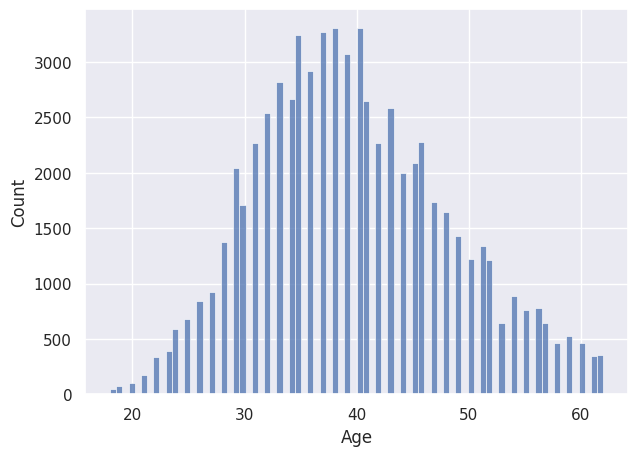

In [396]:
plt.figure(figsize = (7, 5))
sns.histplot(data = df, x = 'Age', bins = 80)
plt.show()

In [397]:
df[df['Balance'] == 0].shape

(33409, 11)

In [398]:
df.shape

(67042, 11)

In [399]:
df[df['Balance'] == 0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
25,703,Spain,Male,39.0,9,0.0,1,1.0,0.0,131363.57,1
28,785,Spain,Male,41.0,4,0.0,1,1.0,0.0,170968.99,1
55,634,France,Female,47.0,1,0.0,1,1.0,0.0,73883.56,1
59,686,France,Female,45.0,4,0.0,1,1.0,0.0,155023.93,1
65,663,France,Female,54.0,6,0.0,1,1.0,1.0,170950.58,1
...,...,...,...,...,...,...,...,...,...,...,...
31239,594,France,Male,37.0,5,0.0,2,1.0,0.0,146895.57,0
96433,683,France,Female,28.0,7,0.0,2,0.0,1.0,48849.89,0
2616,661,Spain,Female,39.0,1,0.0,2,1.0,1.0,27608.12,0
150695,717,France,Female,32.0,6,0.0,2,1.0,1.0,169802.73,0


In [400]:
df = df[df['Balance'] != 0]

In [401]:
df.shape

(33633, 11)

In [402]:
df['Exited'].value_counts()

Exited
1    19402
0    14231
Name: count, dtype: int64

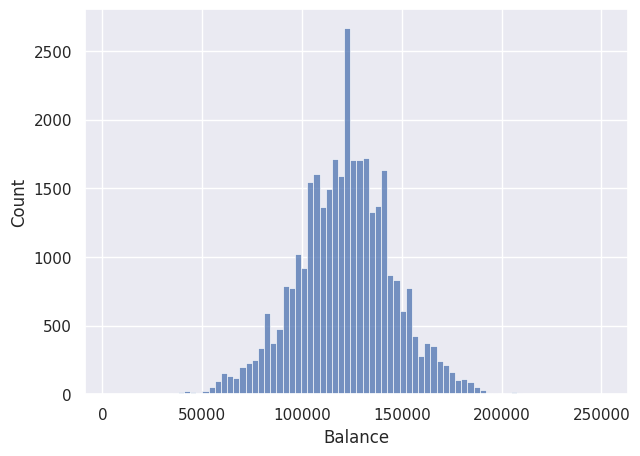

In [403]:
plt.figure(figsize = (7, 5))
sns.histplot(data = df, x = 'Balance', bins = 80)
plt.show()

In [404]:
df1_2 = df[df['Exited'] == 0]
df2_2 = df[df['Exited'] == 1].sample(df1_2.shape[0])

In [405]:
df2 = df.copy()

In [406]:
df = pd.concat([df1_2, df2_2])

In [407]:
df.shape

(28462, 11)

In [408]:
df['Exited'].value_counts()

Exited
0    14231
1    14231
Name: count, dtype: int64

In [409]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
64104,667,France,Female,30.0,5,97720.68,1,0.0,0.0,138700.83,0
18285,596,Germany,Male,37.0,6,141546.35,1,1.0,1.0,113483.96,0
39537,684,France,Male,34.0,1,140950.92,1,1.0,0.0,121592.50,0
33448,757,France,Male,42.0,10,165610.41,1,0.0,0.0,134626.30,0
135087,690,France,Male,42.0,4,85845.43,1,0.0,0.0,120512.08,0


In [410]:
df.reset_index(drop = True, inplace = True)

In [411]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,667,France,Female,30.0,5,97720.68,1,0.0,0.0,138700.83,0
1,596,Germany,Male,37.0,6,141546.35,1,1.0,1.0,113483.96,0
2,684,France,Male,34.0,1,140950.92,1,1.0,0.0,121592.50,0
3,757,France,Male,42.0,10,165610.41,1,0.0,0.0,134626.30,0
4,690,France,Male,42.0,4,85845.43,1,0.0,0.0,120512.08,0


In [412]:
X = df.drop(columns = ['Exited'], axis = 1)
y = df['Exited']

In [413]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000,28462.000000
mean,653.591385,39.846407,4.924707,121372.357384,1.305179,0.741023,0.426358,113778.796930,0.500000
std,77.895086,8.695177,2.832211,24464.673319,0.533256,0.438081,0.494556,50036.207405,0.500009
min,431.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,596.000000,34.000000,2.000000,105853.502500,1.000000,0.000000,0.000000,74871.407500,0.000000
50%,655.000000,39.000000,5.000000,122021.920000,1.000000,1.000000,0.000000,119363.460000,0.500000
75%,709.000000,46.000000,7.000000,137179.390000,2.000000,1.000000,1.000000,156953.540000,1.000000
max,849.000000,62.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000


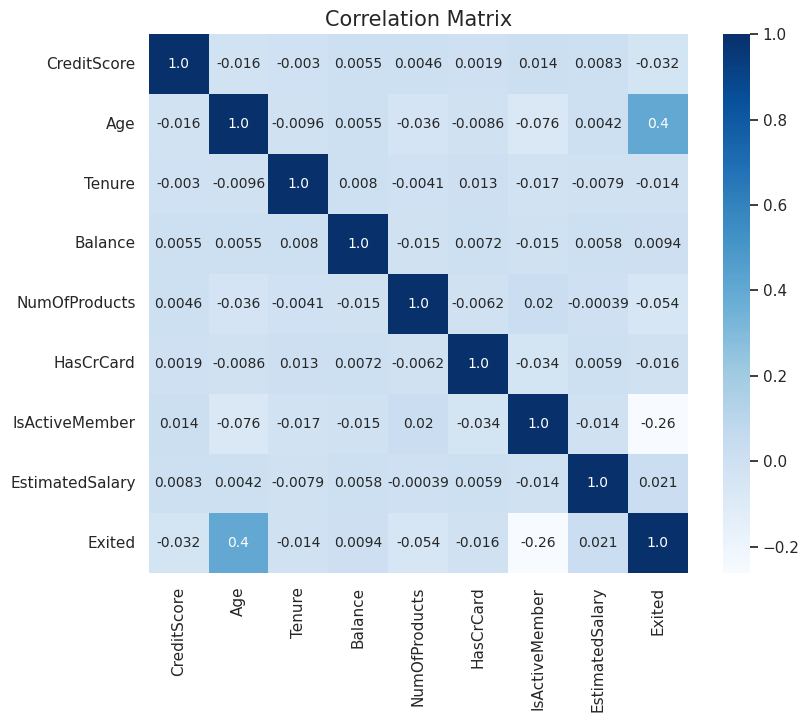

In [414]:
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(numeric_only = True), annot = True, square = True, cbar = True, annot_kws = {'size': 10}, fmt = '.2', cmap = 'Blues')
plt.title('Correlation Matrix', fontsize = 15)
plt.show()

In [415]:
categorical_columns, numerical_columns = [], []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [416]:
categorical_columns

['Geography', 'Gender']

In [417]:
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [418]:
numerical_columns.remove('Exited')

In [419]:
ct = ColumnTransformer(transformers = [
    ('imputer', SimpleImputer(missing_values = np.nan, strategy = 'median'), numerical_columns),
    ('encoder', OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = True), categorical_columns)
], remainder = 'passthrough')

In [420]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,667,France,Female,30.0,5,97720.68,1,0.0,0.0,138700.83
1,596,Germany,Male,37.0,6,141546.35,1,1.0,1.0,113483.96
2,684,France,Male,34.0,1,140950.92,1,1.0,0.0,121592.50
3,757,France,Male,42.0,10,165610.41,1,0.0,0.0,134626.30
4,690,France,Male,42.0,4,85845.43,1,0.0,0.0,120512.08
...,...,...,...,...,...,...,...,...,...,...
28457,599,Germany,Female,35.0,1,117799.28,1,1.0,0.0,53534.80
28458,672,Germany,Male,36.0,2,129748.54,2,1.0,0.0,47271.61
28459,573,France,Female,51.0,8,56228.25,1,1.0,0.0,46857.52
28460,661,France,Male,48.0,4,149136.31,1,1.0,1.0,151317.27


In [421]:
X_train = ct.fit_transform(X)

In [422]:
X_train

array([[667.,  30.,   5., ...,   0.,   0.,   0.],
       [596.,  37.,   6., ...,   1.,   0.,   1.],
       [684.,  34.,   1., ...,   0.,   0.,   1.],
       ...,
       [573.,  51.,   8., ...,   0.,   0.,   0.],
       [661.,  48.,   4., ...,   0.,   0.,   1.],
       [494.,  38.,   3., ...,   1.,   0.,   1.]])

In [423]:
y_train = y

In [424]:
dt = DecisionTreeClassifier()

In [425]:
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 3, 5, 7], 'min_samples_leaf': [1, 3, 5, 7]}

In [426]:
grid = GridSearchCV(dt, param_grid = param_grid, cv = 5)

In [427]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7]})

In [428]:
grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2}

In [429]:
print(f'Validation accuracy of Decision Tree Classifier: {grid.best_score_}')

Validation accuracy of Decision Tree Classifier: 0.7558498934532538


In [430]:
def Bagging(estimator, n_estimators, max_samples, X, y):
    bg = BaggingClassifier(estimator = estimator, n_estimators = n_estimators, max_samples  = max_samples, oob_score = True)
    bg.fit(X, y)
    print(bg.oob_score_)

In [434]:
max_samples = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
oob_scores = []
for i in max_samples:
    oob_scores.append(Bagging(DecisionTreeClassifier(), 100, i, X_train, y_train))
    print(f'Max samples = {i}\n')

0.7487878574942028
Max samples = 0.5

0.7483662427095776
Max samples = 0.6

0.7475581477057128
Max samples = 0.7

0.7442554985594828
Max samples = 0.8

0.742042020940201
Max samples = 0.9

0.741550137024805
Max samples = 1.0



In [438]:
n_estimators = [100, 200, 300, 400]
for i in n_estimators:
    Bagging(DecisionTreeClassifier(), i, 0.5, X_train, y_train)
    print(f'n_estimators = {i}\n')

0.7492797414095987
n_estimators = 100

0.7532148127327665
n_estimators = 200

0.7540229077366313
n_estimators = 300

0.7538823694750896
n_estimators = 400



In [440]:
rf = RandomForestClassifier()

In [445]:
param_grid2 = {'max_depth': [6, 10, 14], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 5]}

In [446]:
grid_rf = GridSearchCV(rf, param_grid = param_grid2, cv = 5)

In [448]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 10, 14],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 6, 10]})

In [449]:
grid_rf.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [450]:
grid.best_score_

0.7558498934532538

In [453]:
ct2 = ColumnTransformer(transformers = [
    ('imputer', SimpleImputer(missing_values = np.nan, strategy = 'median'), numerical_columns),
    ('scaler', StandardScaler(), numerical_columns),
    ('encoder', OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = True), categorical_columns)
], remainder = 'passthrough')

In [458]:
X_train2 = ct2.fit_transform(X)

In [459]:
X_train2

array([[667.,  30.,   5., ...,   0.,   0.,   0.],
       [596.,  37.,   6., ...,   1.,   0.,   1.],
       [684.,  34.,   1., ...,   0.,   0.,   1.],
       ...,
       [573.,  51.,   8., ...,   0.,   0.,   0.],
       [661.,  48.,   4., ...,   0.,   0.,   1.],
       [494.,  38.,   3., ...,   1.,   0.,   1.]])

In [460]:
mu = 0
sigma = 0.1
noise = np.random.normal(mu, sigma, X_train2.shape)

In [461]:
X_noisy = X_train2 + noise

In [467]:
rf2 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 3, min_samples_split = 2)

In [469]:
cvs = cross_val_score(rf2, X_noisy, y_train, cv = 5)

In [470]:
cvs.mean()

0.759468668541547

In [473]:
ds = pd.DataFrame(X_train)
ds.to_csv('data.csv', index = False)

In [475]:
FileLink('data.csv')

/kaggle/working/data.csv

In [476]:
ds_l = pd.DataFrame(y_train)
ds_l.to_csv('label.csv', index = False)

In [477]:
FileLink('label.csv')

/kaggle/working/label.csv

In [481]:
ds_n = pd.DataFrame(X_noisy)
ds_n.to_csv('X_train_noisy.csv', index = False)

In [482]:
FileLink('X_train_noisy.csv')

/kaggle/working/X_train_noisy.csv

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import trange
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
sns.set()

In [2]:
train_data = pd.read_csv('/kaggle/input/train-data1/data.csv')

In [3]:
train_label = pd.read_csv('/kaggle/input/train-label1/label.csv')

In [4]:
train_data

,0,1,2,3,4,5,6,7,8,9,10
0,667.0,30.0,5.0,97720.68,1.0,0.0,0.0,138700.83,0.0,0.0,0.0
1,596.0,37.0,6.0,141546.35,1.0,1.0,1.0,113483.96,1.0,0.0,1.0
2,684.0,34.0,1.0,140950.92,1.0,1.0,0.0,121592.50,0.0,0.0,1.0
3,757.0,42.0,10.0,165610.41,1.0,0.0,0.0,134626.30,0.0,0.0,1.0
4,690.0,42.0,4.0,85845.43,1.0,0.0,0.0,120512.08,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
28457,599.0,35.0,1.0,117799.28,1.0,1.0,0.0,53534.80,1.0,0.0,0.0
28458,672.0,36.0,2.0,129748.54,2.0,1.0,0.0,47271.61,1.0,0.0,1.0
28459,573.0,51.0,8.0,56228.25,1.0,1.0,0.0,46857.52,0.0,0.0,0.0
28460,661.0,48.0,4.0,149136.31,1.0,1.0,1.0,151317.27,0.0,0.0,1.0


In [5]:
scaler = StandardScaler()

In [6]:
train_scaled = scaler.fit_transform(train_data)

In [7]:
train_label

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
28457,1
28458,1
28459,1
28460,1


In [8]:
y = train_label.values

In [9]:
X_train, X_val, y_train, y_val = train_test_split(train_scaled, y, test_size = 0.15, random_state = 101, shuffle = True, stratify = y)

In [10]:
print(f'Train set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')

Train set size: 24192
Validation set size: 4270


In [11]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype = torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [12]:
train_dataset = MyDataset(X_train, y_train)
val_dataset = MyDataset(X_val, y_val)

In [13]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 32, shuffle = False)

In [14]:
for data, label in train_loader:
    print(f'Batch data size: {len(data)}')
    print(f'Labels of the batch data: {label}')
    break

Batch data size: 32
Labels of the batch data: tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.]])


In [15]:
device = ('cuda' if torch.cuda.is_available()
         else 'mps' if torch.backends.mps.is_available()
         else 'cpu')
print(f'Using {device} device')

Using cuda device


In [16]:
def plot_results(train_losses, train_accs, val_losses, val_accs):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    xs = np.arange(1, len(train_losses) + 1, 1)
    axes[0].plot(xs, train_losses, label='Train')
    axes[0].plot(xs, val_losses, label='Validation')
    axes[0].set_title('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_xticks(xs)
    axes[1].plot(xs, train_accs, label='Train')
    axes[1].plot(xs, val_accs, label='Validation')
    axes[1].set_title('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_xticks(xs)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [17]:
def train_step(model, criterion, optimizer, dataloader, device = device):
    running_loss, correct = 0, 0
    model.train()
    optimizer.zero_grad()
    for x, y in dataloader:
        x, y = x.to(device), y.to(device)
        y = y.squeeze().float()
        pred = model(x)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        correct += ((torch.sigmoid(pred) > 0.5).float() == y).sum().item()
    return running_loss / len(dataloader), 100 * correct / len(dataloader.dataset)

In [18]:
def val_step(model, criterion, dataloader, device = device):
    running_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            y = y.squeeze().float()
            pred = model(x)
            running_loss += criterion(pred, y).item()
            correct += ((torch.sigmoid(pred) > 0.5).float() == y).sum().item()
    return running_loss / len(dataloader), 100 * correct / len(dataloader.dataset)

In [19]:
def train_model(model, n_epochs, optimizer, train_loader, val_loader, device = device):
    criterion = nn.BCEWithLogitsLoss()
    train_accs, train_losses = [], []
    val_accs, val_losses = [], []
    for epoch in (pbar := trange(n_epochs)):
        train_loss, train_acc = train_step(model, criterion, optimizer, train_loader, device)
        val_loss, val_acc = val_step(model, criterion, val_loader, device)
        pbar.set_description(f'Train Loss: {train_loss} | Train Acc: {train_acc} | Val Loss: {val_loss} | Val Acc: {val_acc}')
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
    plot_results(train_losses, train_accs, val_losses, val_accs)
    return {'train_loss': train_losses, 'train_acc': train_accs, 'val_loss': val_losses, 'val_acc': val_accs}

In [20]:
num_classes = train_label['Exited'].nunique()
print(f'Number of classes: {num_classes}')

Number of classes: 2


In [121]:
class NN1(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN1, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 256), nn.ReLU(),
                                     nn.Linear(256, 256), nn.ReLU(),
                                     nn.Linear(256, 128), nn.ReLU(),
                                     nn.Linear(128, 64), nn.ReLU(),
                                     nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

In [87]:
for data, targets in train_loader:
    print(targets.shape)
    break

torch.Size([32, 1])


Train Loss: 0.49001257827199957 | Train Acc: 76.68650793650794 | Val Loss: 0.5228777232009973 | Val Acc: 75.97189695550351: 100%|██████████| 30/30 [00:48<00:00,  1.63s/it] 


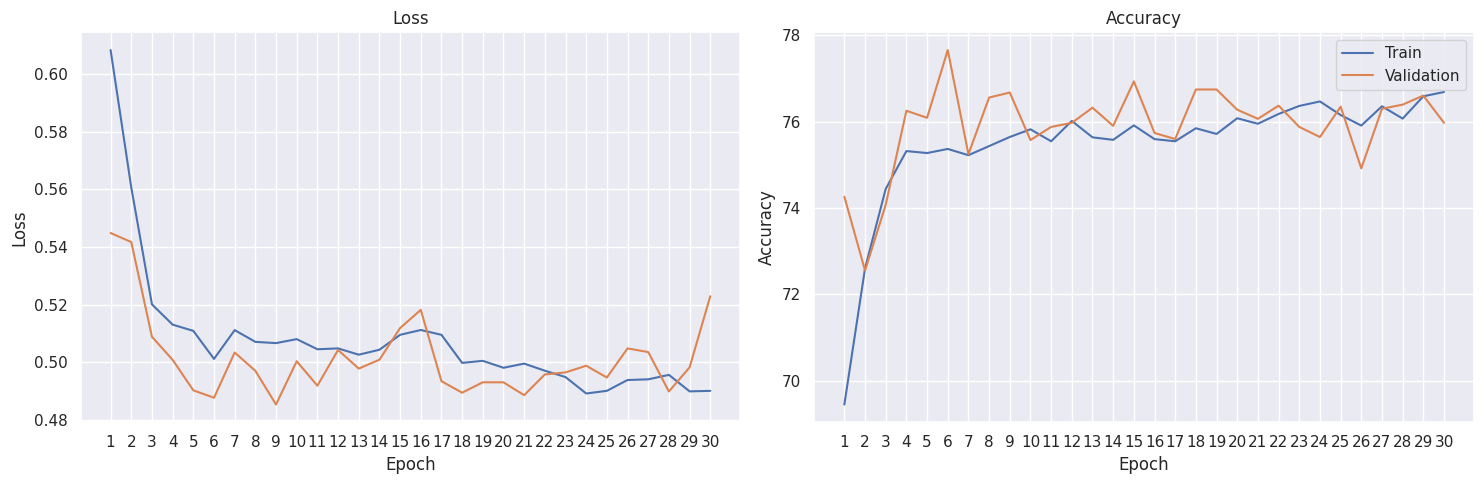

In [122]:
model = NN1(input_size = 11, num_classes = 1).to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

Train Loss: 0.704196136701044 | Train Acc: 50.09920634920635 | Val Loss: 0.7186377150798912 | Val Acc: 50.0: 100%|██████████| 30/30 [00:47<00:00,  1.60s/it]              


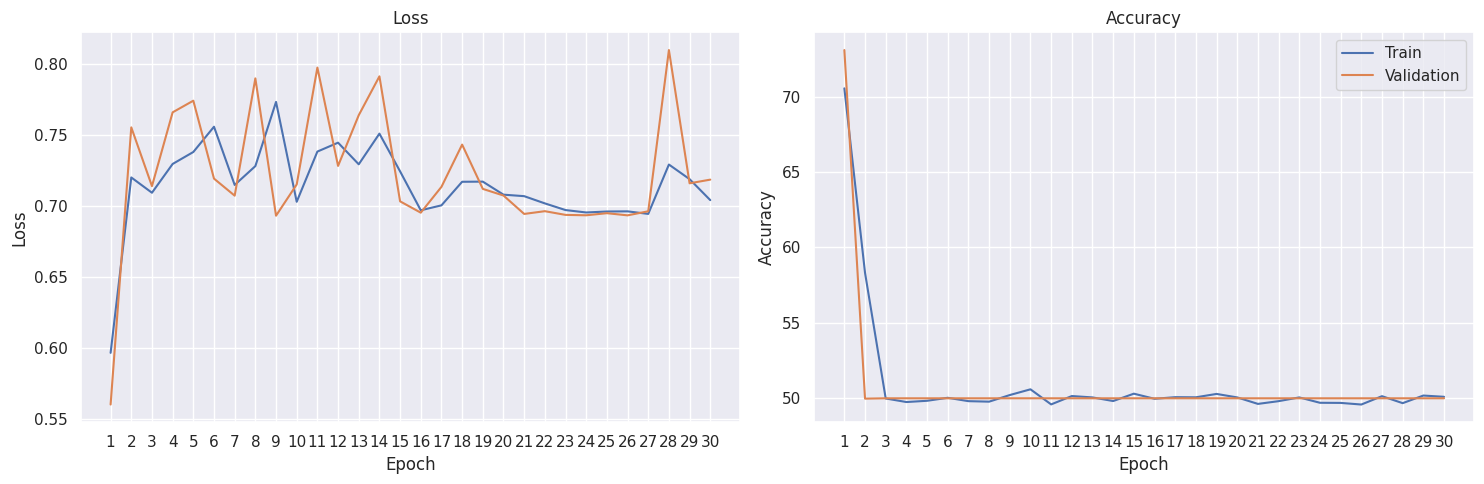

In [125]:
model = NN1(input_size = 11, num_classes = 1).to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.01)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

Train Loss: 0.4883448569862931 | Train Acc: 76.67410714285714 | Val Loss: 0.4907434157915969 | Val Acc: 76.20608899297424: 100%|██████████| 30/30 [00:48<00:00,  1.61s/it]  


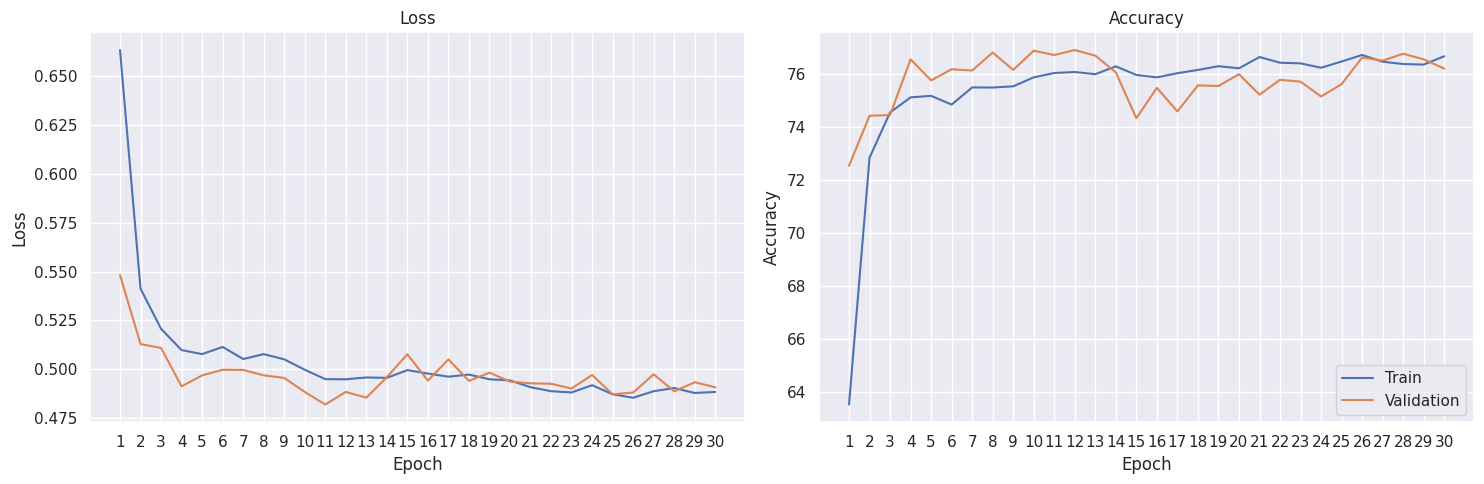

In [126]:
model = NN1(input_size = 11, num_classes = 1).to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.0001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

In [129]:
class NNBN1(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NNBN1, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 256), nn.BatchNorm1d(256), nn.ReLU(),
                                     nn.Linear(256, 256), nn.BatchNorm1d(256), nn.ReLU(),
                                     nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(),
                                     nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(),
                                     nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

Train Loss: 0.5014381163492405 | Train Acc: 75.72751322751323 | Val Loss: 0.5047102121274862 | Val Acc: 76.01873536299766: 100%|██████████| 30/30 [01:07<00:00,  2.24s/it]  


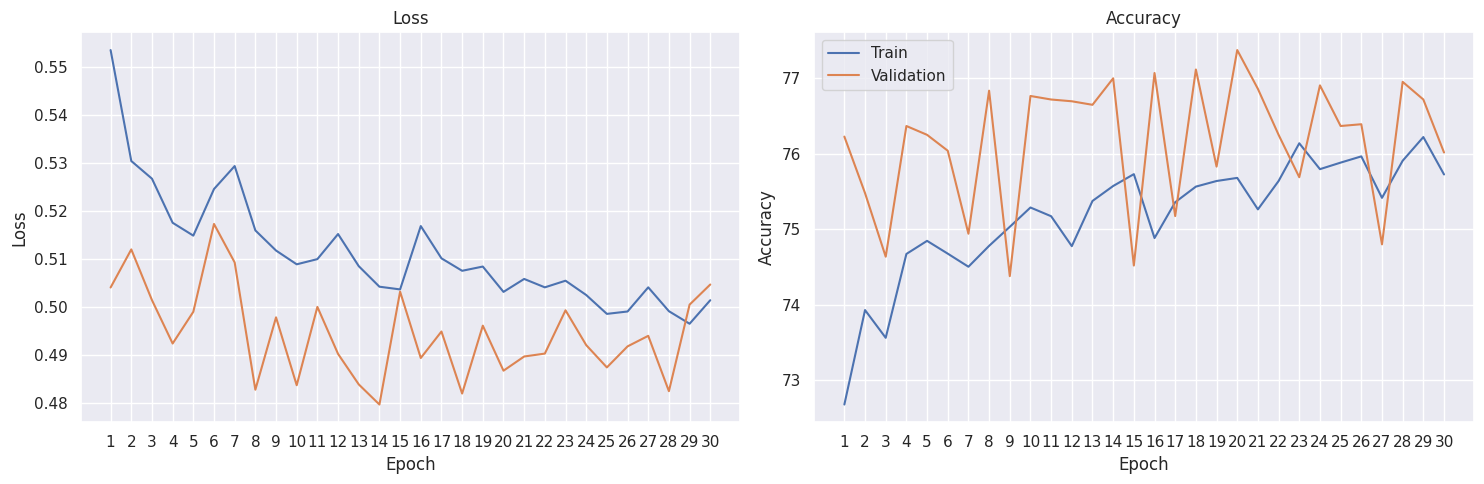

In [130]:
model = NNBN1(input_size = 11, num_classes = 1).to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

In [131]:
class NN2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN2, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 512), nn.ReLU(),
                                     nn.Linear(512, 512), nn.ReLU(),
                                     nn.Linear(512, 256), nn.ReLU(),
                                     nn.Linear(256, 256), nn.ReLU(),
                                     nn.Linear(256, 128), nn.ReLU(),
                                     nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(),
                                     nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

Train Loss: 0.493282054802255 | Train Acc: 76.1698082010582 | Val Loss: 0.4847768805365064 | Val Acc: 77.21311475409836: 100%|██████████| 30/30 [01:01<00:00,  2.06s/it]    


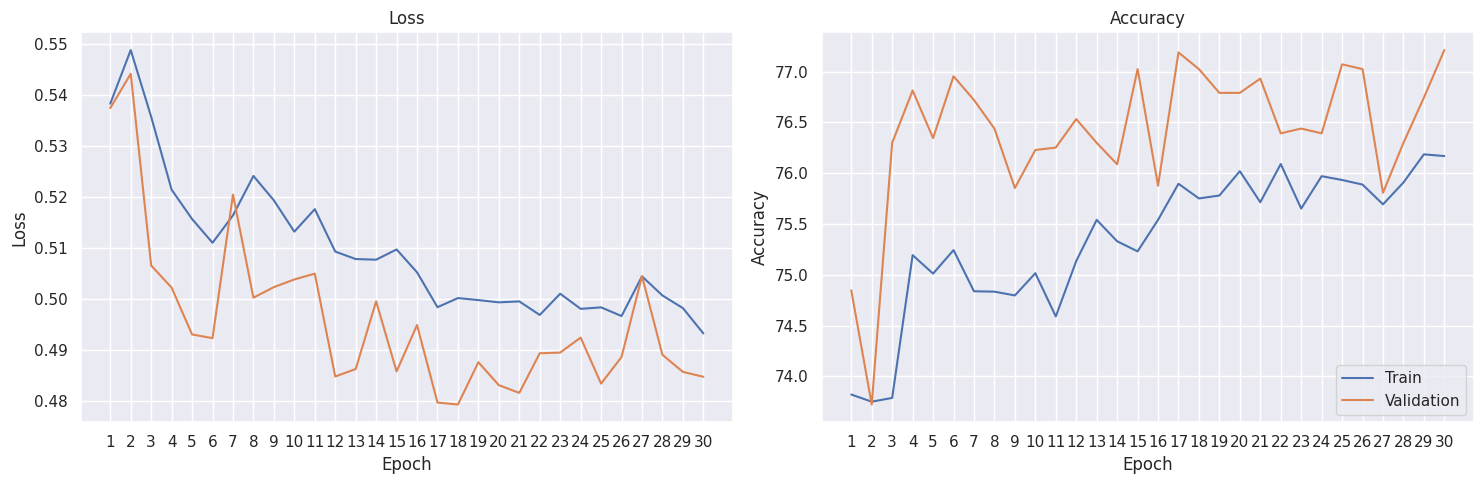

In [132]:
model = NN2(input_size = 11, num_classes = 1).to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

In [134]:
class NN3(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN3, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 512), nn.ReLU(),
                                     nn.Linear(512, 512), nn.ReLU(),
                                     nn.Linear(512, 256), nn.ReLU(),
                                     nn.Linear(256, 256), nn.ReLU(),
                                     nn.Linear(256, 128), nn.ReLU(),
                                     nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(),
                                     nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

Train Loss: 0.4975276366664619 | Train Acc: 76.05820105820106 | Val Loss: 0.4841093956979353 | Val Acc: 77.30679156908666: 100%|██████████| 30/30 [01:12<00:00,  2.43s/it] 


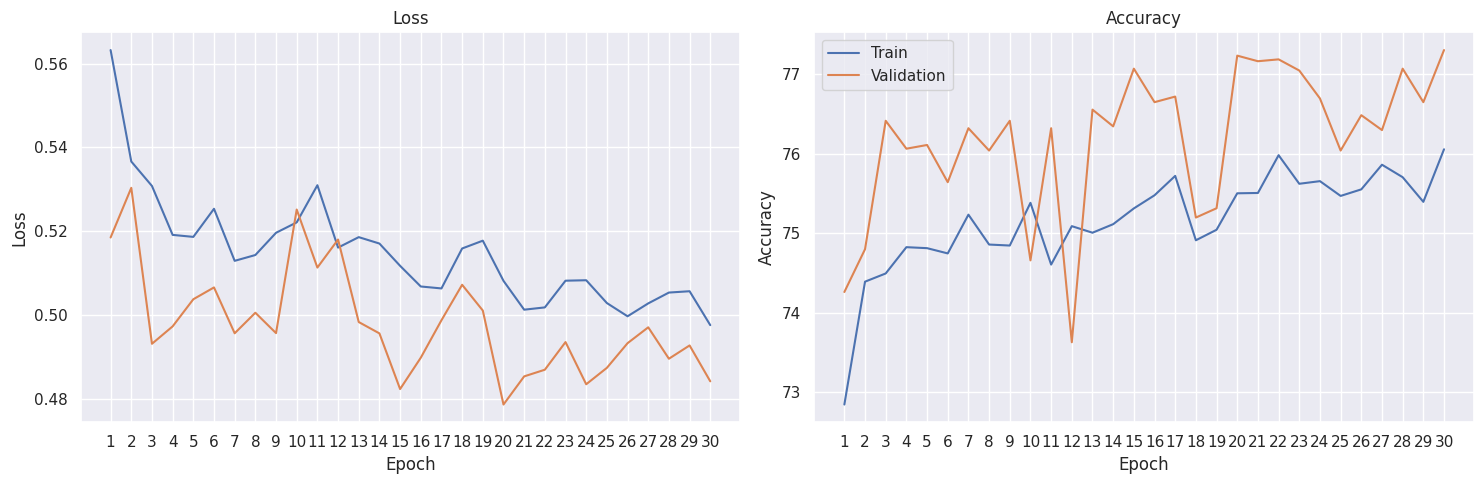

In [135]:
model = NN3(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

In [141]:
class NN4(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN4, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 1024), nn.ReLU(),
                                     nn.Linear(1024, 1024), nn.ReLU(),
                                     nn.Linear(1024, 512), nn.ReLU(),
                                     nn.Linear(512, 512), nn.ReLU(),
                                     nn.Linear(512, 256), nn.ReLU(),
                                     nn.Linear(256, 256), nn.ReLU(),
                                     nn.Linear(256, 128), nn.ReLU(),
                                     nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(),
                                     nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

Train Loss: 0.5005318367528537 | Train Acc: 75.7771164021164 | Val Loss: 0.49507996395452697 | Val Acc: 76.93208430913349: 100%|██████████| 30/30 [01:25<00:00,  2.85s/it]  


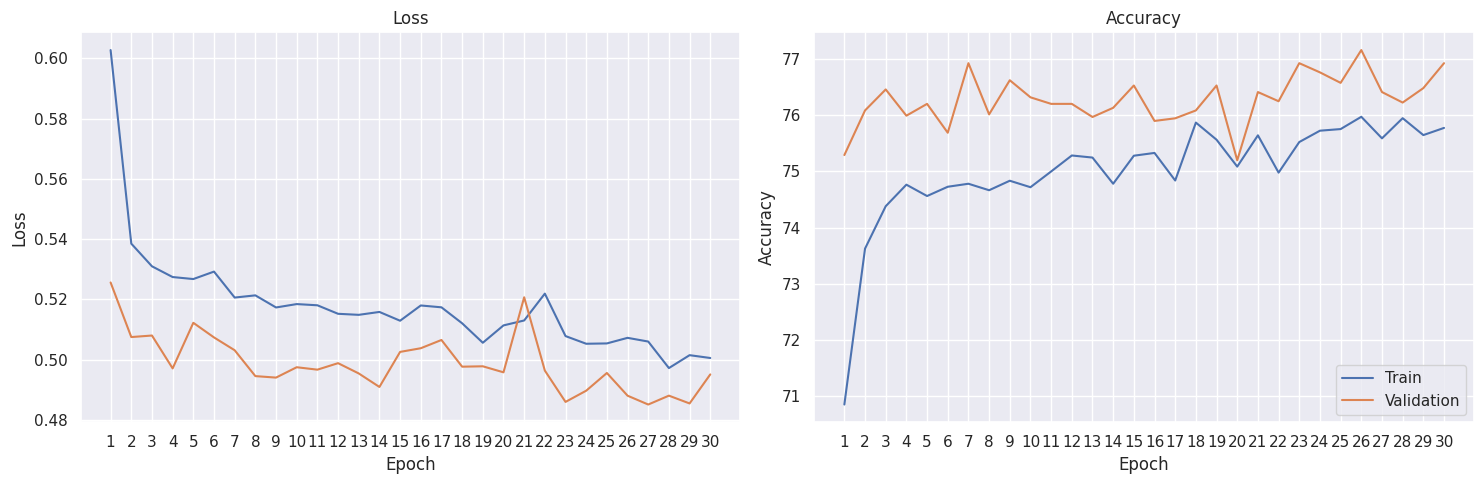

In [142]:
model = NN4(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

In [143]:
class NN5(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN5, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 1024), nn.ReLU(),
                                     nn.Linear(1024, 1024), nn.ReLU(),
                                     nn.Linear(1024, 512), nn.ReLU(),
                                     nn.Linear(512, 512), nn.ReLU(),
                                     nn.Linear(512, 256), nn.ReLU(),
                                     nn.Linear(256, 256), nn.ReLU(),
                                     nn.Linear(256, 128), nn.ReLU(),
                                     nn.Linear(128, 64), nn.ReLU(),
                                     nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

Train Loss: 0.693945203193281 | Train Acc: 49.776785714285715 | Val Loss: 0.6937363797159337 | Val Acc: 50.0: 100%|██████████| 30/30 [01:20<00:00,  2.67s/it] 


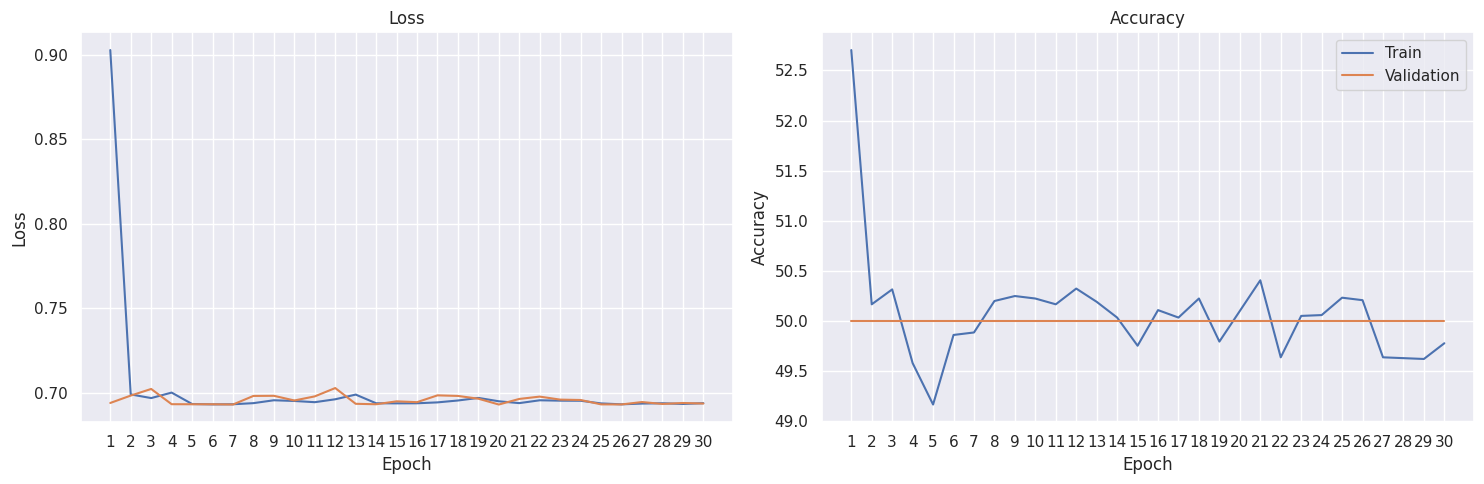

In [144]:
model = NN5(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

In [145]:
class NN6(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN6, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 1024), nn.ReLU(),
                                     nn.Linear(1024, 1024), nn.ReLU(),
                                     nn.Linear(1024, 512), nn.ReLU(),
                                     nn.Linear(512, 512), nn.ReLU(),
                                     nn.Linear(512, 256), nn.ReLU(),
                                     nn.Linear(256, 256), nn.ReLU(),
                                     nn.Linear(256, 128), nn.ReLU(),
                                     nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(),
                                     nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

Train Loss: 0.4711044706285946 | Train Acc: 77.29828042328042 | Val Loss: 0.7256096832787813 | Val Acc: 50.0: 100%|██████████| 60/60 [02:50<00:00,  2.85s/it]               


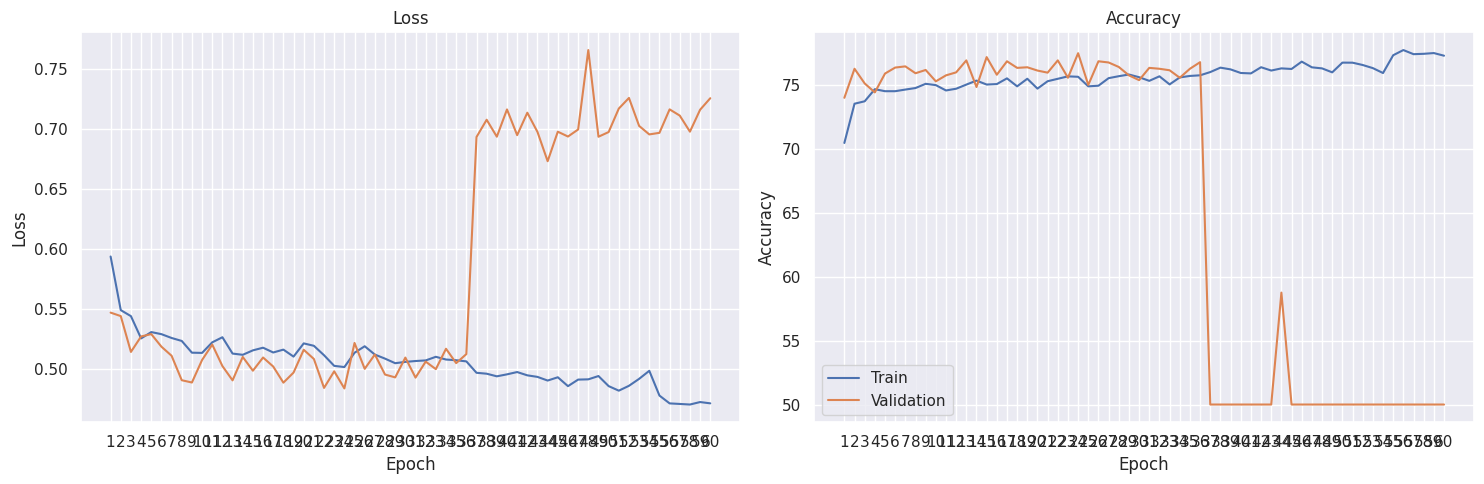

In [146]:
model = NN6(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
results = train_model(model, 60, optimizer, train_loader, val_loader, device = device)

In [149]:
class NN7(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN7, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 1024), nn.BatchNorm1d(1024), nn.ReLU(),
                                     nn.Linear(1024, 1024), nn.BatchNorm1d(1024), nn.ReLU(),
                                     nn.Linear(1024, 512), nn.BatchNorm1d(512), nn.ReLU(),
                                     nn.Linear(512, 512), nn.BatchNorm1d(512), nn.ReLU(),
                                     nn.Linear(512, 256), nn.BatchNorm1d(256), nn.ReLU(),
                                     nn.Linear(256, 256), nn.BatchNorm1d(256), nn.ReLU(),
                                     nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(),
                                     nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(),
                                     nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

Train Loss: 0.5204651631296627 | Train Acc: 74.04513888888889 | Val Loss: 0.5116270978504153 | Val Acc: 75.97189695550351: 100%|██████████| 30/30 [01:54<00:00,  3.82s/it] 


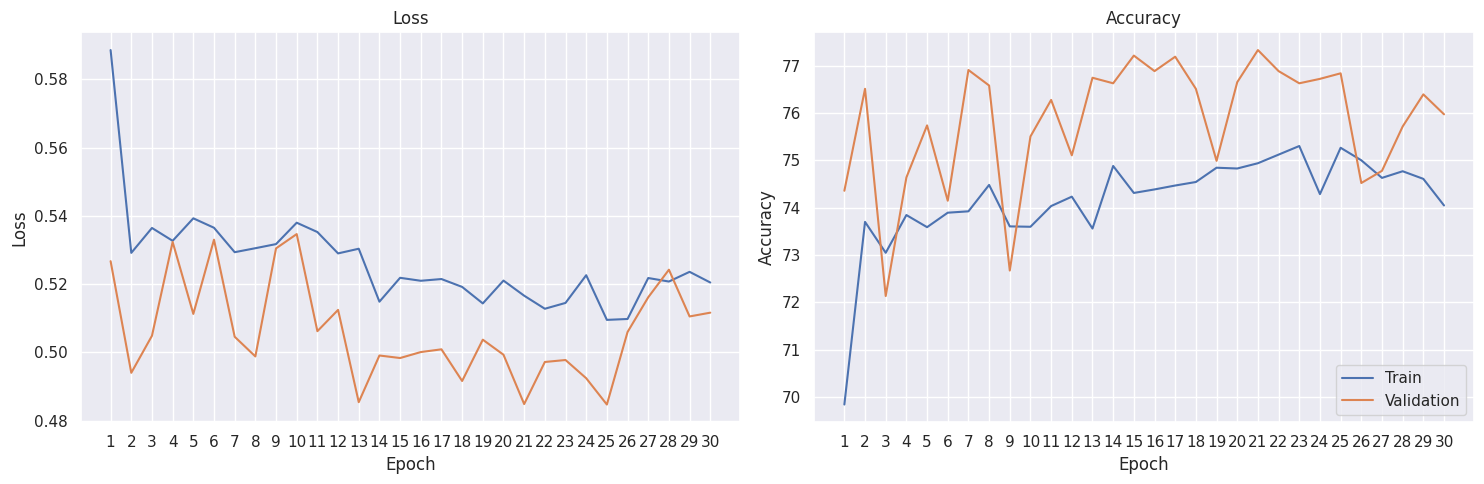

In [150]:
model = NN7(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

In [23]:
class NNDO(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NNDO, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 1024), nn.ReLU(), nn.Dropout(0.50),
                                    nn.Linear(1024, 1024), nn.ReLU(), nn.Dropout(0.50),
                                    nn.Linear(1024, 512), nn.ReLU(), nn.Dropout(0.25),
                                    nn.Linear(512, 512), nn.ReLU(), nn.Dropout(0.25),
                                    nn.Linear(512, 256), nn.ReLU(), nn.Dropout(0.15),
                                    nn.Linear(256, 256), nn.ReLU(), nn.Dropout(0.15),
                                    nn.Linear(256, 128), nn.ReLU(), nn.Dropout(0.05),
                                    nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(), nn.Dropout(0.05),
                                    nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

Train Loss: 0.5273331043818009 | Train Acc: 74.13194444444444 | Val Loss: 0.4942072280752125 | Val Acc: 77.44730679156909: 100%|██████████| 30/30 [01:39<00:00,  3.33s/it] 


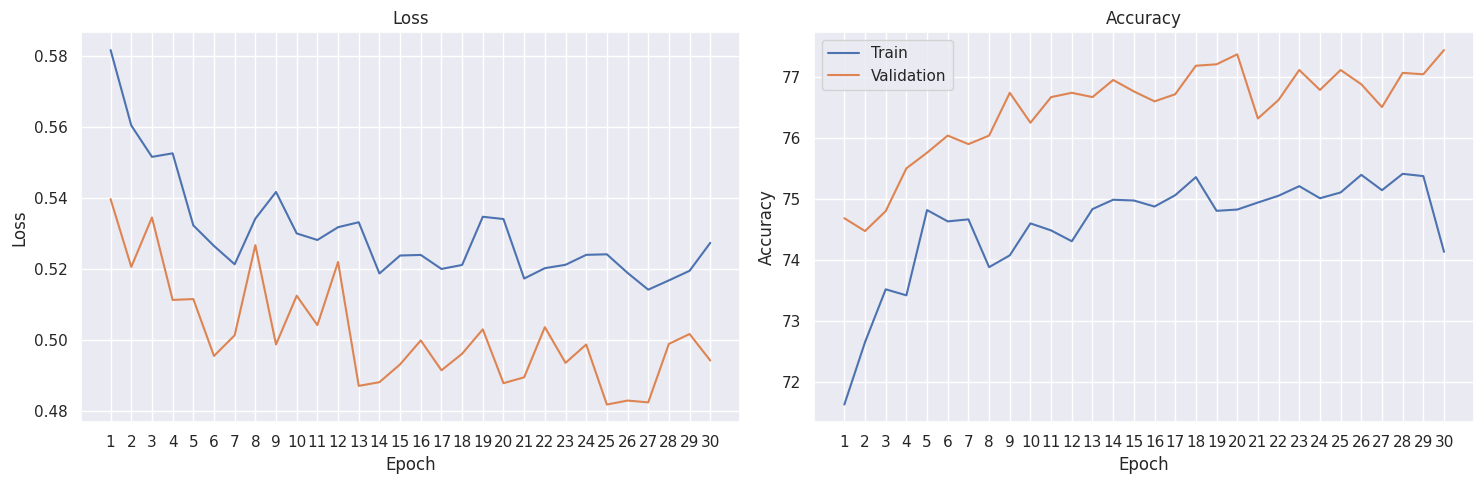

In [24]:
model = NNDO(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

In [29]:
class NNDOBN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NNDOBN, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_size, 1024), nn.BatchNorm1d(1024), nn.ReLU(), nn.Dropout(0.50),
                                    nn.Linear(1024, 1024), nn.BatchNorm1d(1024), nn.ReLU(), nn.Dropout(0.50),
                                    nn.Linear(1024, 512), nn.BatchNorm1d(512), nn.ReLU(), nn.Dropout(0.25),
                                    nn.Linear(512, 512), nn.BatchNorm1d(512), nn.ReLU(), nn.Dropout(0.25),
                                    nn.Linear(512, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.15),
                                    nn.Linear(256, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.15),
                                    nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.05),
                                    nn.Linear(128, 64), nn.BatchNorm1d(64), nn.ReLU(), nn.Dropout(0.05),
                                    nn.Linear(64, num_classes))

    def forward(self, x):
        return self.network(x).squeeze(dim = 1)

Train Loss: 0.537499765633906 | Train Acc: 73.48710317460318 | Val Loss: 0.5104121921667412 | Val Acc: 72.24824355971897: 100%|██████████| 30/30 [02:07<00:00,  4.24s/it]  


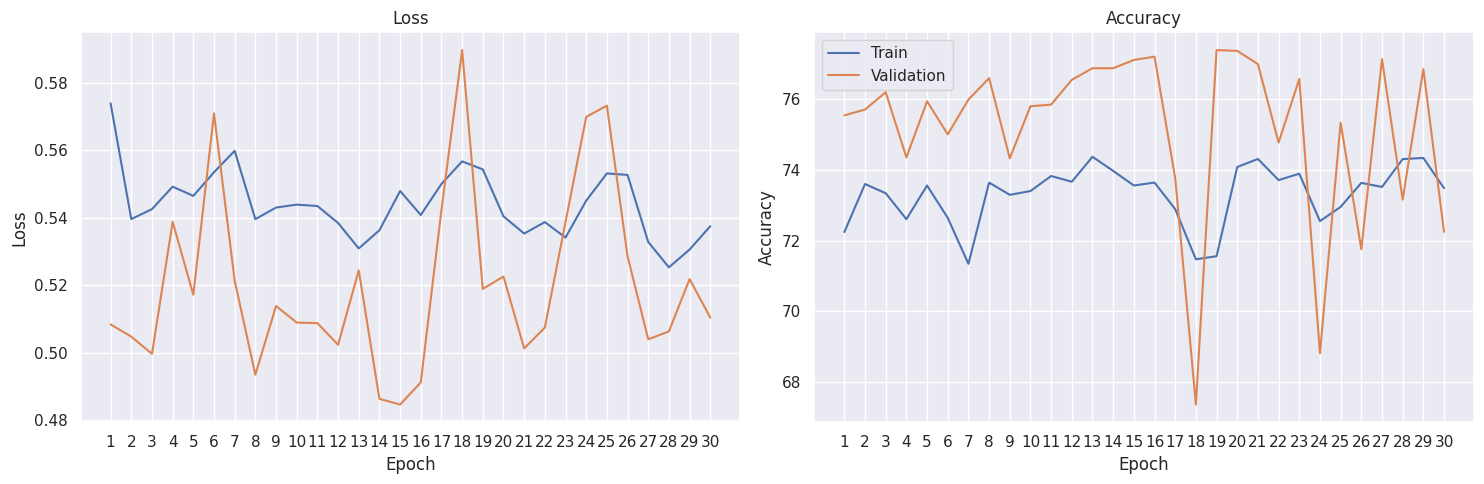

In [30]:
model = NNDOBN(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
results = train_model(model, 30, optimizer, train_loader, val_loader, device = device)

Train Loss: 0.5322240929676112 | Train Acc: 73.82192460317461 | Val Loss: 0.5046169359737368 | Val Acc: 76.88524590163935: 100%|██████████| 60/60 [04:07<00:00,  4.13s/it] 


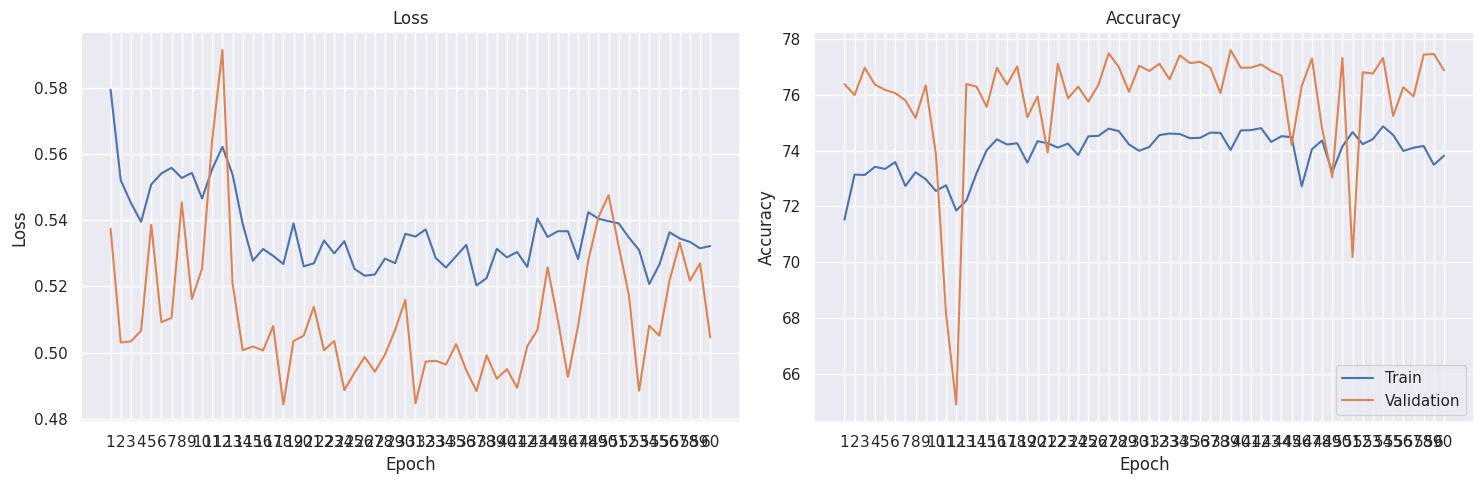

In [31]:
model = NNDOBN(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
results = train_model(model, 60, optimizer, train_loader, val_loader, device = device)

In [33]:
class ResidualBlock(nn.Module):    
    def __init__(self, in_channels, out_channels):  
        super(ResidualBlock, self).__init__()  
        self.conv1 = nn.Linear(in_channels, out_channels)  
        self.bn1 = nn.BatchNorm1d(out_channels)  
        self.conv2 = nn.Linear(out_channels, out_channels)  
        self.bn2 = nn.BatchNorm1d(out_channels)  

        # Shortcut layer: if input and output dimensions are different  
        self.shortcut = nn.Linear(in_channels, out_channels) if in_channels != out_channels else None  
        
    def forward(self, x):  
        identity = x if self.shortcut is None else self.shortcut(x)  
        out = F.relu(self.bn1(self.conv1(x)))   
        out = self.bn2(self.conv2(out))          
        out += identity                           
        return F.relu(out)

In [38]:
class NNDOBNWithResiduals(nn.Module):  
    def __init__(self, input_size, num_classes):  
        super(NNDOBNWithResiduals, self).__init__()  
        self.layer1 = ResidualBlock(input_size, 1024)  
        self.layer2 = ResidualBlock(1024, 1024)  
        self.layer3 = ResidualBlock(1024, 512)  
        self.layer4 = ResidualBlock(512, 512)  
        self.layer5 = ResidualBlock(512, 256)  
        self.layer6 = ResidualBlock(256, 256)  
        self.layer7 = ResidualBlock(256, 128)  
        self.layer8 = ResidualBlock(128, 64)  
        self.layer9 = nn.BatchNorm1d(64)
        self.output_layer = nn.Linear(64, num_classes)  

    def forward(self, x):  
        x = self.layer1(x)  
        x = self.layer2(x)  
        x = self.layer3(x)  
        x = self.layer4(x)  
        x = self.layer5(x)  
        x = self.layer6(x)  
        x = self.layer7(x)  
        x = self.layer8(x)  
        return self.output_layer(x).squeeze(dim = 1)

Train Loss: 0.4381918415979103 | Train Acc: 79.01785714285714 | Val Loss: 0.5279595649509288 | Val Acc: 74.98829039812647: 100%|██████████| 50/50 [06:19<00:00,  7.60s/it]  


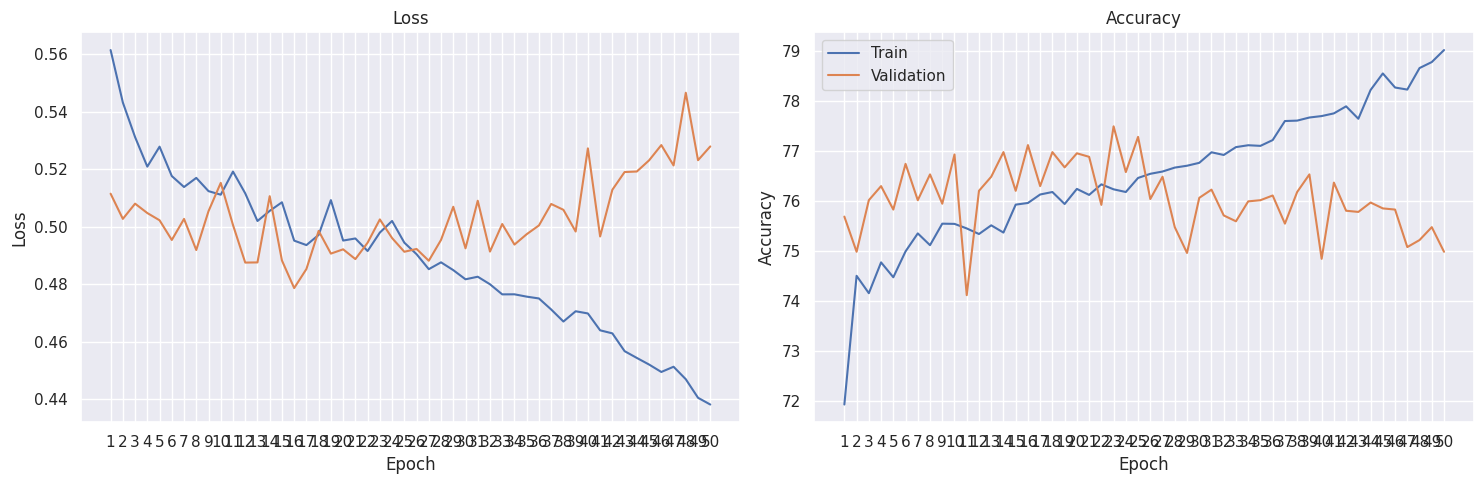

In [43]:
model = NNDOBNWithResiduals(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
results = train_model(model, 50, optimizer, train_loader, val_loader, device = device)

In [51]:
class NNDOBNWithResiduals3(nn.Module):  
    def __init__(self, input_size, num_classes):  
        super(NNDOBNWithResiduals3, self).__init__()  
        self.layer1 = ResidualBlock(input_size, 256)  
        self.layer2 = nn.Dropout(0.50)
        self.layer3 = ResidualBlock(256, 256)  
        self.layer4 = nn.Dropout(0.50)
        self.layer5 = ResidualBlock(256, 128)  
        self.layer6 = nn.Dropout(0.25)
        self.layer7 = ResidualBlock(128, 128) 
        self.layer8 = nn.Dropout(0.25)
        self.layer9 = ResidualBlock(128, 64)  
        self.layer10 = nn.Dropout(0.15)
        self.layer11 = ResidualBlock(64, 32)  
        self.layer12 = nn.Dropout(0.15)
        self.layer13 = nn.BatchNorm1d(32)
        self.output_layer = nn.Linear(32, num_classes)  

    def forward(self, x):  
        x = self.layer1(x)  
        x = self.layer2(x)  
        x = self.layer3(x)  
        x = self.layer4(x)  
        x = self.layer5(x)  
        x = self.layer6(x)  
        x = self.layer7(x) 
        x = self.layer8(x)  
        x = self.layer9(x)  
        x = self.layer10(x)  
        x = self.layer11(x)  
        x = self.layer12(x)  
        x = self.layer13(x)
        return self.output_layer(x).squeeze(dim = 1)

Train Loss: 0.4692755085490053 | Train Acc: 77.45949074074075 | Val Loss: 0.524069659078299 | Val Acc: 74.40281030444964: 100%|██████████| 50/50 [04:34<00:00,  5.49s/it]   


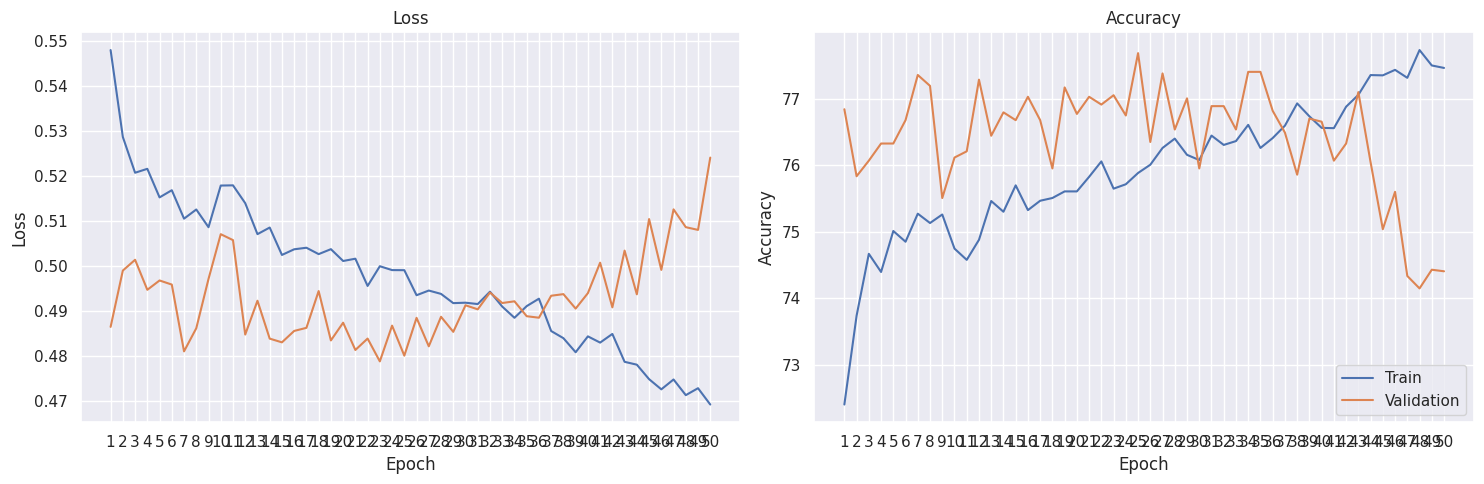

In [45]:
model = NNDOBNWithResiduals2(input_size = 11, num_classes = 1).to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
results = train_model(model, 50, optimizer, train_loader, val_loader, device = device)

In [58]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization, ReLU
from keras.callbacks import EarlyStopping

In [66]:
model = Sequential()

In [67]:
model.add(Input(shape = (11,)))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.50))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.50))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.15))
model.add(Dense(32))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.15))
model.add(Dense(1, activation = 'sigmoid'))

In [68]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [69]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [70]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val), callbacks = [early_stopping], batch_size = 32)

Epoch 1/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6472 - loss: 0.6388 - val_accuracy: 0.7588 - val_loss: 0.5055
Epoch 2/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7281 - loss: 0.5535 - val_accuracy: 0.7642 - val_loss: 0.4881
Epoch 3/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7389 - loss: 0.5355 - val_accuracy: 0.7639 - val_loss: 0.4865
Epoch 4/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7394 - loss: 0.5401 - val_accuracy: 0.7628 - val_loss: 0.4859
Epoch 5/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7371 - loss: 0.5367 - val_accuracy: 0.7660 - val_loss: 0.4836
Epoch 6/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7434 - loss: 0.5280 - val_accuracy: 0.7660 - val_loss: 0.4835
Epoch 7/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7462 - loss: 0.5273 - val_accuracy: 0.7679 - val_loss: 0.4859
Epoch 8/100
756/756 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7429 - loss: 0.5253 - val_acc

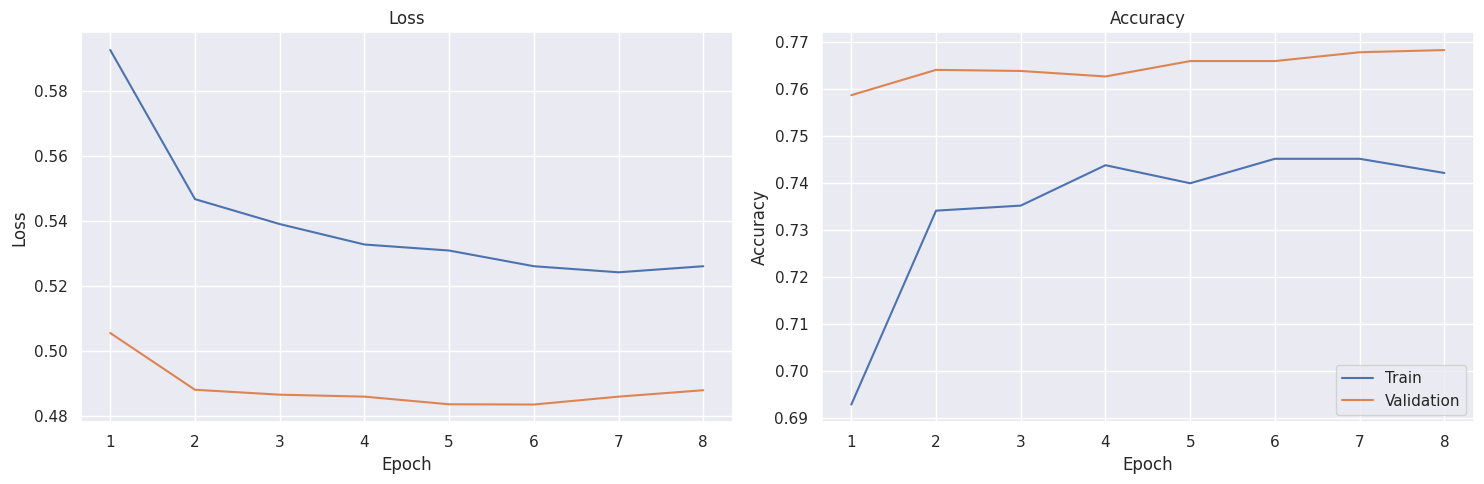

In [71]:
plot_results(history.history['loss'], history.history['accuracy'], history.history['val_loss'], history.history['val_accuracy'])